# Анализ качества работы нейронной сети для распознавания моделей одежды в Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (Файл -> Создать копию на Диске). Свою копию вы сможете изменять и запускать.


In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import LambdaCallback
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [2]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Список с названиями классов

In [3]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

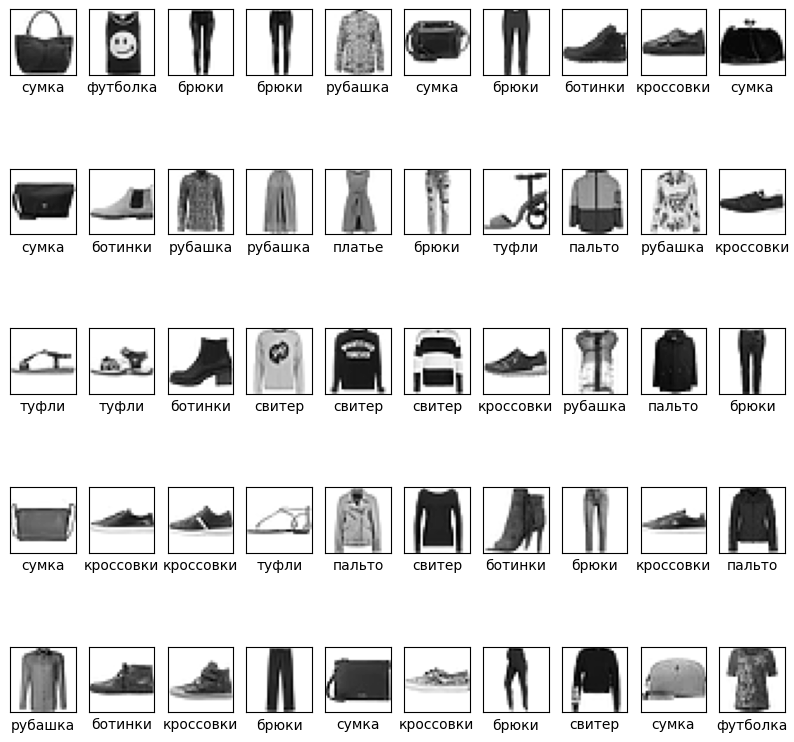

In [4]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормализация данных**

In [6]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255
x_test = x_test / 255

**Работа с правильными ответами**

In [7]:
n = 0

In [8]:
print(y_train[n])

9


**Преобразуем метки в формат one hot encoding**

In [9]:
y_train = utils.to_categorical(y_train, 10)

In [10]:
y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [11]:
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [12]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [13]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636010 (2.43 MB)
Trainable params: 636010 (2.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## Обучаем нейронную сеть

In [14]:
history = model.fit(x_train, y_train,
                    batch_size=200,
                    epochs=5,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/5
240/240 [==============================] - 5s 8ms/step - loss: 0.5384 - accuracy: 0.8134 - val_loss: 0.4133 - val_accuracy: 0.8580
Epoch 2/5
240/240 [==============================] - 2s 7ms/step - loss: 0.3951 - accuracy: 0.8597 - val_loss: 0.3612 - val_accuracy: 0.8730
Epoch 3/5
240/240 [==============================] - 2s 6ms/step - loss: 0.3432 - accuracy: 0.8761 - val_loss: 0.3619 - val_accuracy: 0.8697
Epoch 4/5
240/240 [==============================] - 2s 8ms/step - loss: 0.3180 - accuracy: 0.8855 - val_loss: 0.3390 - val_accuracy: 0.8801
Epoch 5/5
240/240 [==============================] - 2s 10ms/step - loss: 0.2932 - accuracy: 0.8937 - val_loss: 0.3276 - val_accuracy: 0.8783


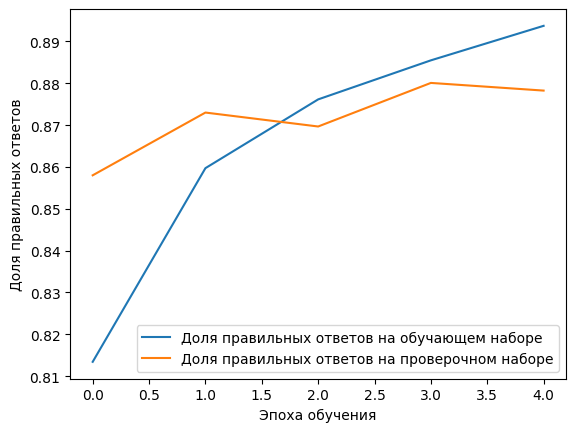

In [15]:
plt.plot(history.history['accuracy'],
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

## Сохраняем нейронную сеть для последующего использования

In [16]:
model.save('fashion_mnist_dense.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [17]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3526 - accuracy: 0.8717


In [18]:
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля правильных ответов на тестовых данных, в процентах: 87.17


## Используем сеть для распознавания предметов одежды

In [19]:
n_rec = 497

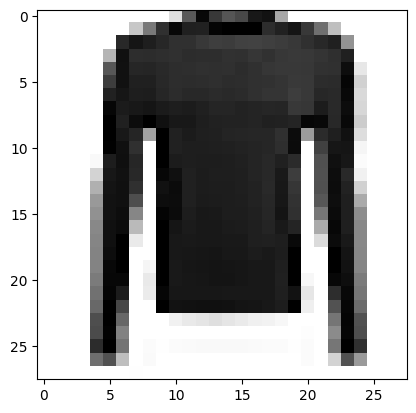

In [20]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Меняем размерность изображения и нормализуем его**

In [21]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [22]:
prediction = model.predict(x)

1/1 [==============================] - 0s 91ms/step


**Печатаем результаты распознавания**

In [23]:
prediction

array([[2.7679058e-03, 1.0210494e-05, 9.9477273e-01, 4.2741385e-06,
        7.3827442e-04, 4.7277586e-09, 1.4744577e-03, 3.3265063e-10,
        2.3211711e-04, 1.6522504e-08]], dtype=float32)

**Преобразуем результаты из формата one hot encoding**

In [24]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])


Номер класса: 2
Название класса: свитер


**Печатаем правильный ответ**

In [25]:
label = np.argmax(y_test[n_rec])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 2
Название класса: свитер


## Самостоятельная работа

1. Попробуйте использовать разное количество нейронов на входном слое: 400, 600, 800, 1200.
2. Добавьте в нейронную сеть скрытый слой с разным количеством нейронов: 200, 300, 400, 600, 800.
3. Добавьте несколько скрытых слоев в сеть с разным количеством нейронов в каждом слое.
3. Используйте разное количество эпох: 10, 15, 20, 25, 30.
4. Используйте разные размеры мини-выборки (batch_size): 10, 50, 100, 200, 500.


Подберить разные комбинации гиперпараметров таким образом, чтобы получить лучший результат на тестовом наборе данных.

Убедитесь, что в вашей модели нет переобучения.

Напишем функции создающие и тестирующие наши нейронные сети с различными гиперпараметрами, которые строят графики, выводят в консоль точность на треине и тесте, а также логируют в список все наши гиперпараметры и значения точности


Training model with Input Neurons: 400, Hidden Layers: [200], Batch Size: 10
Epoch: 10, Training Accuracy: 0.9074333310127258, Test Accuracy: 0.8794000148773193
Epoch: 15, Training Accuracy: 0.9171833395957947, Test Accuracy: 0.882099986076355
Epoch: 20, Training Accuracy: 0.9248666763305664, Test Accuracy: 0.8853999972343445
Epoch: 25, Training Accuracy: 0.9307500123977661, Test Accuracy: 0.8866000175476074
Epoch: 30, Training Accuracy: 0.9345666766166687, Test Accuracy: 0.8863999843597412


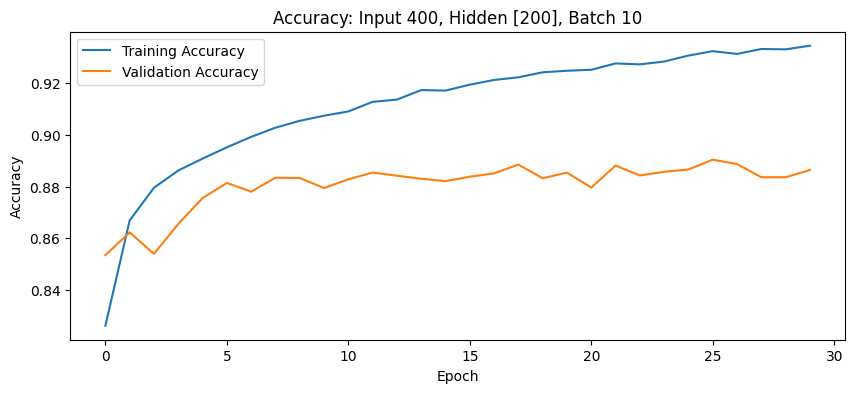


Training model with Input Neurons: 400, Hidden Layers: [200], Batch Size: 50
Epoch: 10, Training Accuracy: 0.9168333411216736, Test Accuracy: 0.8876000046730042
Epoch: 15, Training Accuracy: 0.9309666752815247, Test Accuracy: 0.8849999904632568
Epoch: 20, Training Accuracy: 0.9413999915122986, Test Accuracy: 0.8895000219345093
Epoch: 25, Training Accuracy: 0.9504833221435547, Test Accuracy: 0.8924000263214111
Epoch: 30, Training Accuracy: 0.9556999802589417, Test Accuracy: 0.8888000249862671


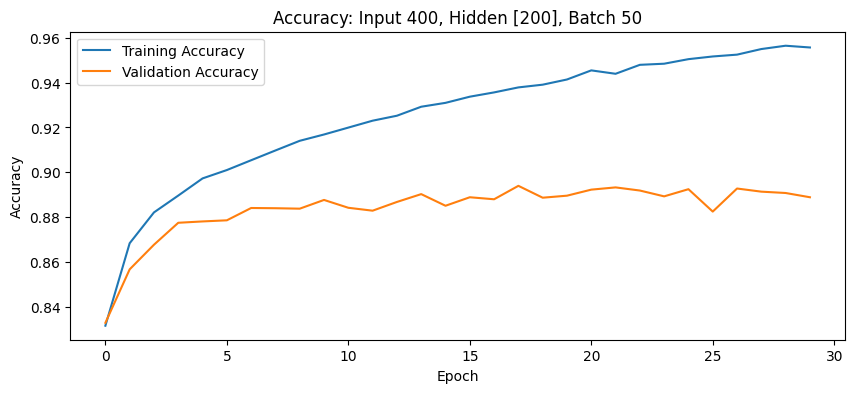


Training model with Input Neurons: 400, Hidden Layers: [200], Batch Size: 100
Epoch: 10, Training Accuracy: 0.9176499843597412, Test Accuracy: 0.8934999704360962
Epoch: 15, Training Accuracy: 0.9310500025749207, Test Accuracy: 0.8967000246047974
Epoch: 20, Training Accuracy: 0.9448000192642212, Test Accuracy: 0.8883000016212463
Epoch: 25, Training Accuracy: 0.9525833129882812, Test Accuracy: 0.8880000114440918
Epoch: 30, Training Accuracy: 0.960099995136261, Test Accuracy: 0.8934000134468079


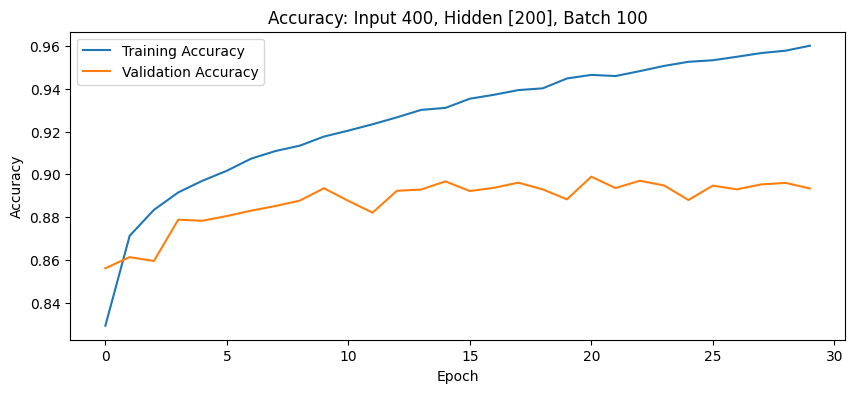


Training model with Input Neurons: 400, Hidden Layers: [200], Batch Size: 200
Epoch: 10, Training Accuracy: 0.9168000221252441, Test Accuracy: 0.8759999871253967
Epoch: 15, Training Accuracy: 0.9325166940689087, Test Accuracy: 0.8956000208854675
Epoch: 20, Training Accuracy: 0.9443166851997375, Test Accuracy: 0.8968999981880188
Epoch: 25, Training Accuracy: 0.9521833062171936, Test Accuracy: 0.8945000171661377
Epoch: 30, Training Accuracy: 0.9588833451271057, Test Accuracy: 0.8971999883651733


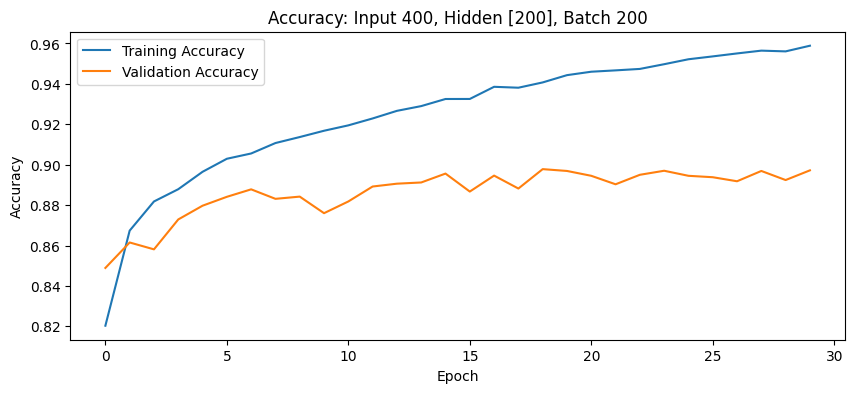


Training model with Input Neurons: 400, Hidden Layers: [200], Batch Size: 500
Epoch: 10, Training Accuracy: 0.9122999906539917, Test Accuracy: 0.8863000273704529
Epoch: 15, Training Accuracy: 0.9254166483879089, Test Accuracy: 0.8925999999046326
Epoch: 20, Training Accuracy: 0.9386500120162964, Test Accuracy: 0.895799994468689
Epoch: 25, Training Accuracy: 0.9485833048820496, Test Accuracy: 0.8924999833106995
Epoch: 30, Training Accuracy: 0.9555666446685791, Test Accuracy: 0.8978000283241272


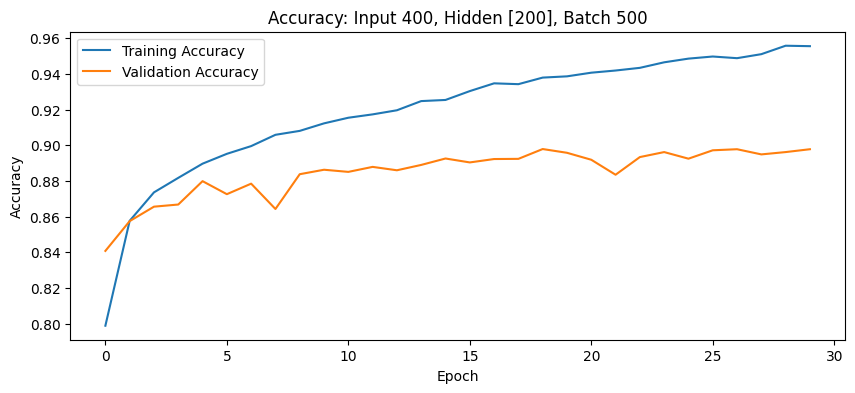


Training model with Input Neurons: 400, Hidden Layers: [300], Batch Size: 10
Epoch: 10, Training Accuracy: 0.9066166877746582, Test Accuracy: 0.8737000226974487
Epoch: 15, Training Accuracy: 0.9160333275794983, Test Accuracy: 0.8844000101089478
Epoch: 20, Training Accuracy: 0.9223499894142151, Test Accuracy: 0.8827999830245972
Epoch: 25, Training Accuracy: 0.926800012588501, Test Accuracy: 0.8791999816894531
Epoch: 30, Training Accuracy: 0.9313333630561829, Test Accuracy: 0.8885999917984009


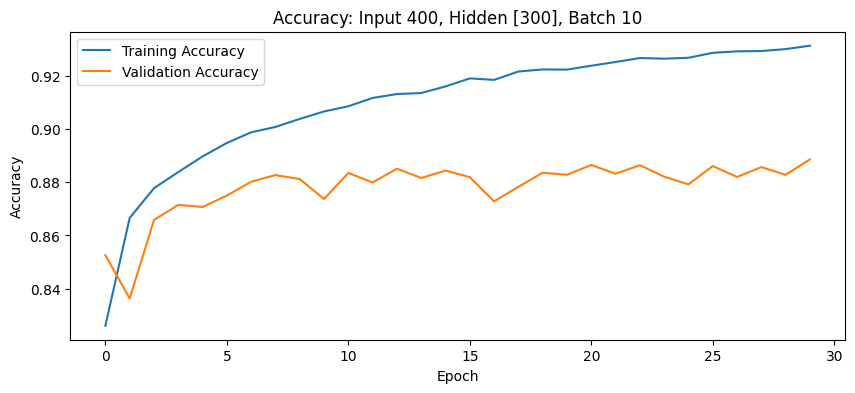


Training model with Input Neurons: 400, Hidden Layers: [300], Batch Size: 50
Epoch: 10, Training Accuracy: 0.9164333343505859, Test Accuracy: 0.8842999935150146
Epoch: 15, Training Accuracy: 0.9316333532333374, Test Accuracy: 0.8906999826431274
Epoch: 20, Training Accuracy: 0.9430666565895081, Test Accuracy: 0.8847000002861023
Epoch: 25, Training Accuracy: 0.9523166418075562, Test Accuracy: 0.8948000073432922
Epoch: 30, Training Accuracy: 0.9562333226203918, Test Accuracy: 0.8895000219345093


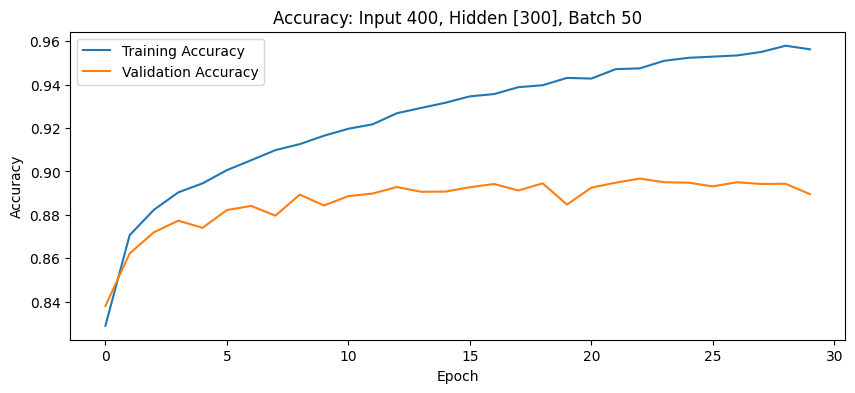


Training model with Input Neurons: 400, Hidden Layers: [300], Batch Size: 100
Epoch: 10, Training Accuracy: 0.919783353805542, Test Accuracy: 0.8853999972343445
Epoch: 15, Training Accuracy: 0.9347500205039978, Test Accuracy: 0.8964999914169312
Epoch: 20, Training Accuracy: 0.9438999891281128, Test Accuracy: 0.8914999961853027
Epoch: 25, Training Accuracy: 0.9547833204269409, Test Accuracy: 0.8884000182151794
Epoch: 30, Training Accuracy: 0.9606000185012817, Test Accuracy: 0.8981999754905701


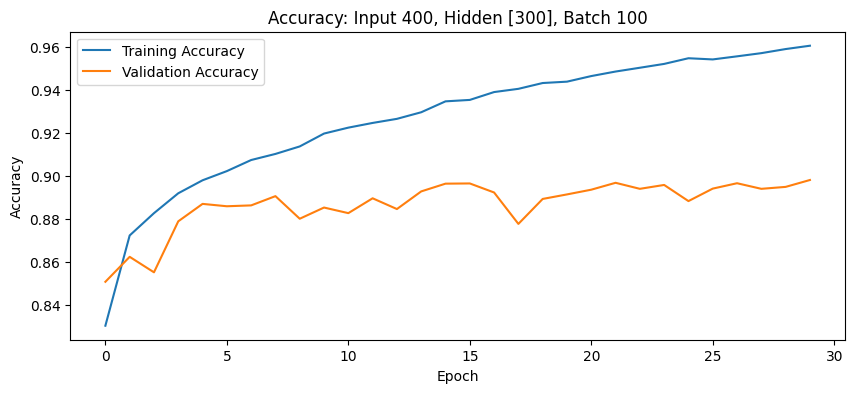


Training model with Input Neurons: 400, Hidden Layers: [300], Batch Size: 200
Epoch: 10, Training Accuracy: 0.9172499775886536, Test Accuracy: 0.8859999775886536
Epoch: 15, Training Accuracy: 0.9337833523750305, Test Accuracy: 0.8876000046730042
Epoch: 20, Training Accuracy: 0.9424333572387695, Test Accuracy: 0.8955000042915344
Epoch: 25, Training Accuracy: 0.9518833160400391, Test Accuracy: 0.8996999859809875
Epoch: 30, Training Accuracy: 0.960016667842865, Test Accuracy: 0.8932999968528748


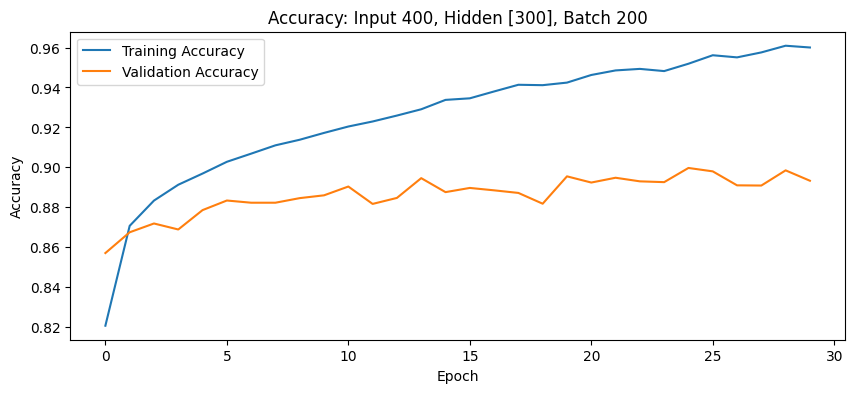


Training model with Input Neurons: 400, Hidden Layers: [300], Batch Size: 500
Epoch: 10, Training Accuracy: 0.9132833480834961, Test Accuracy: 0.8865000009536743
Epoch: 15, Training Accuracy: 0.9318333268165588, Test Accuracy: 0.8876000046730042
Epoch: 20, Training Accuracy: 0.9415333271026611, Test Accuracy: 0.8920000195503235
Epoch: 25, Training Accuracy: 0.9514833092689514, Test Accuracy: 0.8953999876976013
Epoch: 30, Training Accuracy: 0.9598666429519653, Test Accuracy: 0.8988999724388123


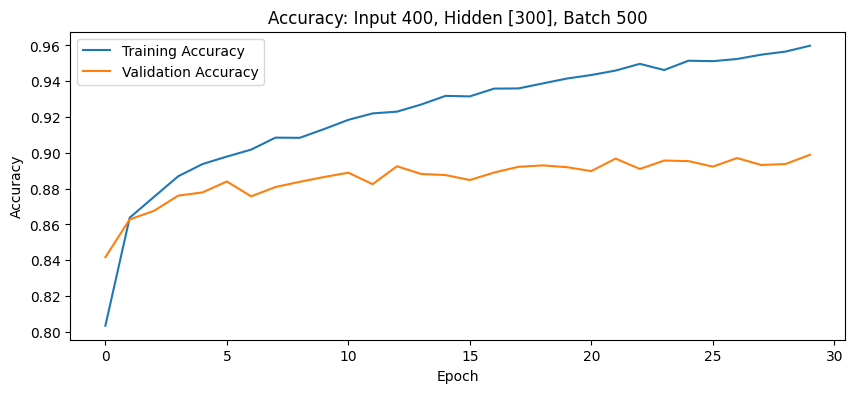


Training model with Input Neurons: 400, Hidden Layers: [400], Batch Size: 10
Epoch: 10, Training Accuracy: 0.9058833122253418, Test Accuracy: 0.8863000273704529
Epoch: 15, Training Accuracy: 0.916100025177002, Test Accuracy: 0.8827000260353088
Epoch: 20, Training Accuracy: 0.9223499894142151, Test Accuracy: 0.8876000046730042
Epoch: 25, Training Accuracy: 0.9267500042915344, Test Accuracy: 0.8867999911308289
Epoch: 30, Training Accuracy: 0.9308666586875916, Test Accuracy: 0.8862000107765198


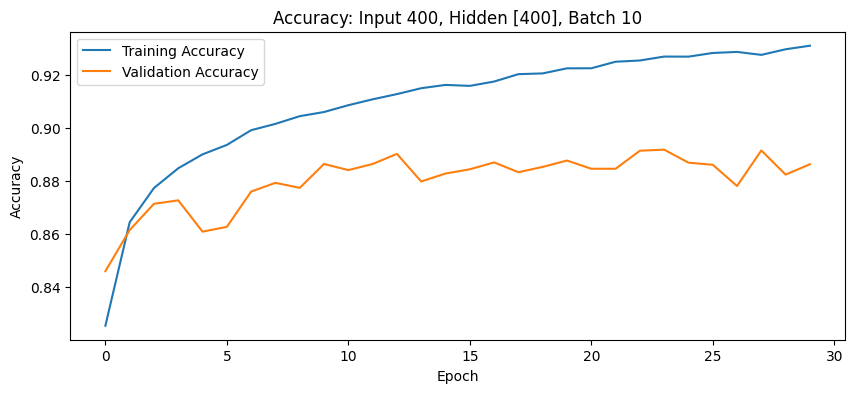


Training model with Input Neurons: 400, Hidden Layers: [400], Batch Size: 50
Epoch: 10, Training Accuracy: 0.918749988079071, Test Accuracy: 0.8892999887466431
Epoch: 15, Training Accuracy: 0.9327666759490967, Test Accuracy: 0.8970000147819519
Epoch: 20, Training Accuracy: 0.9435833096504211, Test Accuracy: 0.8930000066757202
Epoch: 25, Training Accuracy: 0.9529833197593689, Test Accuracy: 0.8920000195503235
Epoch: 30, Training Accuracy: 0.9607166647911072, Test Accuracy: 0.8945000171661377


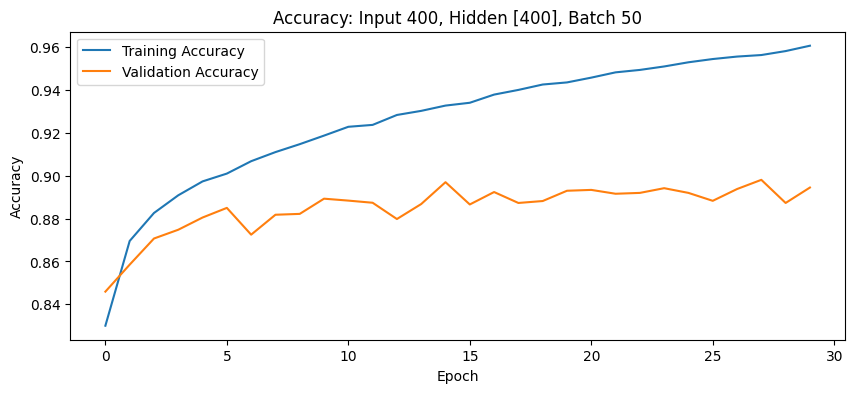


Training model with Input Neurons: 400, Hidden Layers: [400], Batch Size: 100
Epoch: 10, Training Accuracy: 0.9181166887283325, Test Accuracy: 0.8924000263214111
Epoch: 15, Training Accuracy: 0.9352499842643738, Test Accuracy: 0.8895000219345093
Epoch: 20, Training Accuracy: 0.9444833397865295, Test Accuracy: 0.8944000005722046
Epoch: 25, Training Accuracy: 0.9530666470527649, Test Accuracy: 0.8962000012397766
Epoch: 30, Training Accuracy: 0.9616333246231079, Test Accuracy: 0.8992999792098999


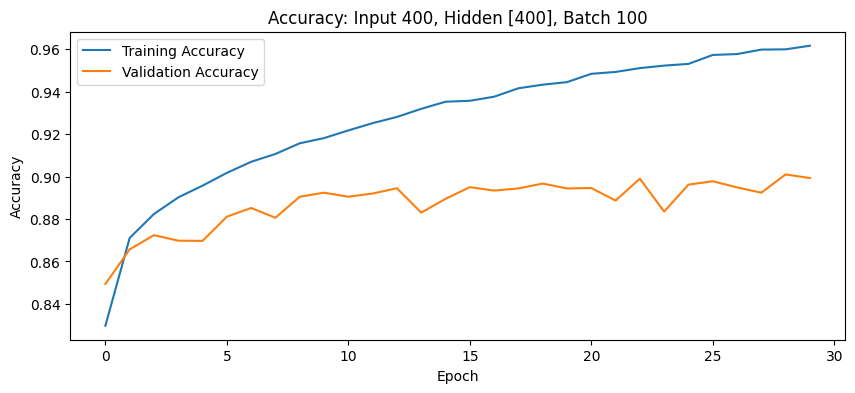


Training model with Input Neurons: 400, Hidden Layers: [400], Batch Size: 200
Epoch: 10, Training Accuracy: 0.9178166389465332, Test Accuracy: 0.8903999924659729
Epoch: 15, Training Accuracy: 0.932533323764801, Test Accuracy: 0.8950999975204468
Epoch: 20, Training Accuracy: 0.9457166790962219, Test Accuracy: 0.890500009059906
Epoch: 25, Training Accuracy: 0.9546833038330078, Test Accuracy: 0.8974000215530396
Epoch: 30, Training Accuracy: 0.9612833261489868, Test Accuracy: 0.8776999711990356


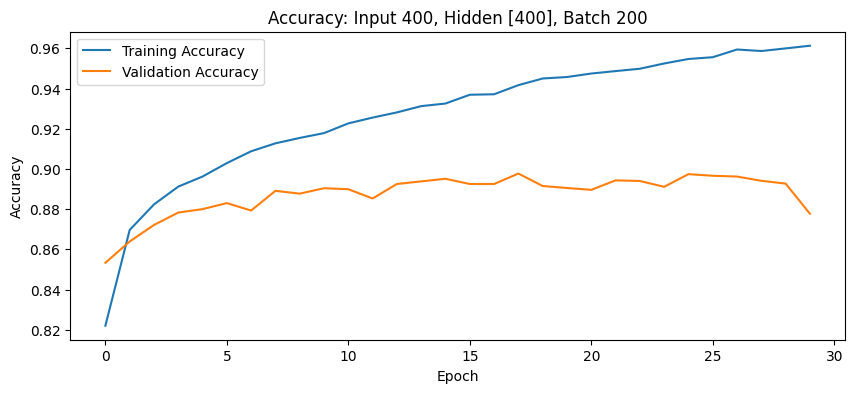


Training model with Input Neurons: 400, Hidden Layers: [400], Batch Size: 500
Epoch: 10, Training Accuracy: 0.9163333177566528, Test Accuracy: 0.8866999745368958
Epoch: 15, Training Accuracy: 0.930733323097229, Test Accuracy: 0.8960999846458435
Epoch: 20, Training Accuracy: 0.9400333166122437, Test Accuracy: 0.8859000205993652
Epoch: 25, Training Accuracy: 0.9488999843597412, Test Accuracy: 0.8859000205993652
Epoch: 30, Training Accuracy: 0.9590666890144348, Test Accuracy: 0.8970999717712402


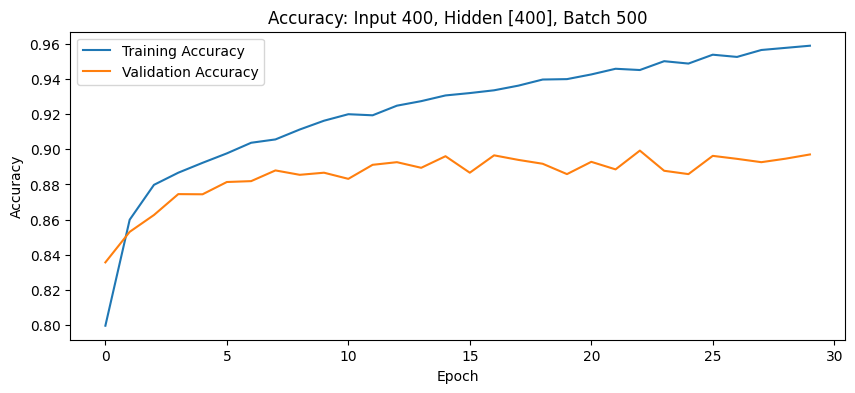


Training model with Input Neurons: 400, Hidden Layers: [600], Batch Size: 10
Epoch: 10, Training Accuracy: 0.9050666689872742, Test Accuracy: 0.8755000233650208
Epoch: 15, Training Accuracy: 0.9135500192642212, Test Accuracy: 0.8877999782562256
Epoch: 20, Training Accuracy: 0.920799970626831, Test Accuracy: 0.8888999819755554
Epoch: 25, Training Accuracy: 0.9251000285148621, Test Accuracy: 0.8877000212669373
Epoch: 30, Training Accuracy: 0.9285500049591064, Test Accuracy: 0.8845999836921692


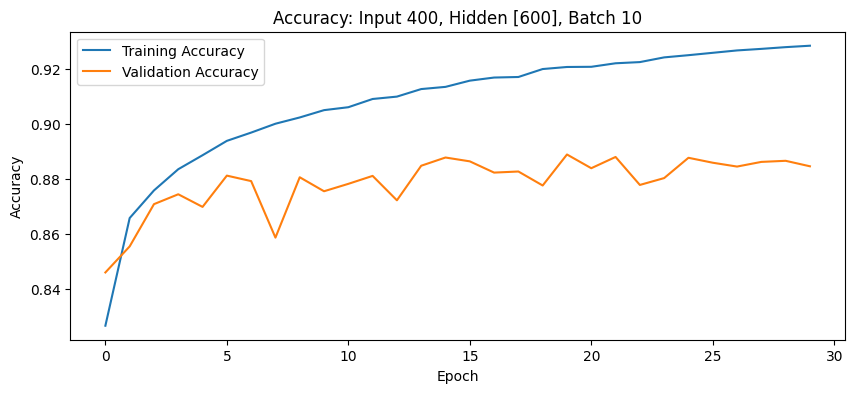


Training model with Input Neurons: 400, Hidden Layers: [600], Batch Size: 50
Epoch: 10, Training Accuracy: 0.9174666404724121, Test Accuracy: 0.8823000192642212
Epoch: 15, Training Accuracy: 0.9325666427612305, Test Accuracy: 0.8931000232696533
Epoch: 20, Training Accuracy: 0.9437500238418579, Test Accuracy: 0.8822000026702881
Epoch: 25, Training Accuracy: 0.9526000022888184, Test Accuracy: 0.8931000232696533
Epoch: 30, Training Accuracy: 0.9599666595458984, Test Accuracy: 0.8968999981880188


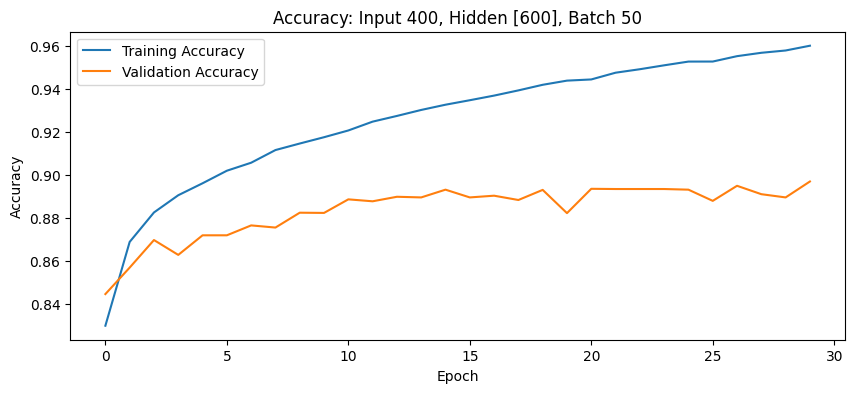


Training model with Input Neurons: 400, Hidden Layers: [600], Batch Size: 100
Epoch: 10, Training Accuracy: 0.9191499948501587, Test Accuracy: 0.8823000192642212
Epoch: 15, Training Accuracy: 0.9348000288009644, Test Accuracy: 0.8877999782562256
Epoch: 20, Training Accuracy: 0.9472166895866394, Test Accuracy: 0.8956999778747559
Epoch: 25, Training Accuracy: 0.9562000036239624, Test Accuracy: 0.8960000276565552
Epoch: 30, Training Accuracy: 0.963699996471405, Test Accuracy: 0.8968999981880188


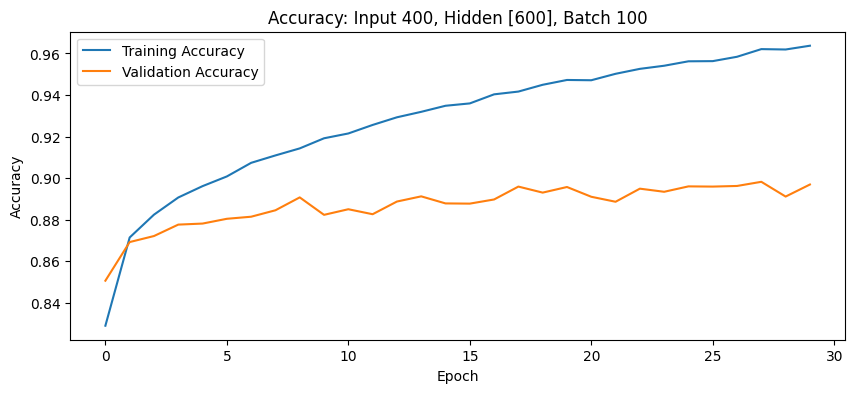


Training model with Input Neurons: 400, Hidden Layers: [600], Batch Size: 200
Epoch: 10, Training Accuracy: 0.9203333258628845, Test Accuracy: 0.8842999935150146
Epoch: 15, Training Accuracy: 0.9357166886329651, Test Accuracy: 0.8960000276565552
Epoch: 20, Training Accuracy: 0.9460833072662354, Test Accuracy: 0.8949999809265137
Epoch: 25, Training Accuracy: 0.9540666937828064, Test Accuracy: 0.8912000060081482
Epoch: 30, Training Accuracy: 0.9629166722297668, Test Accuracy: 0.8876000046730042


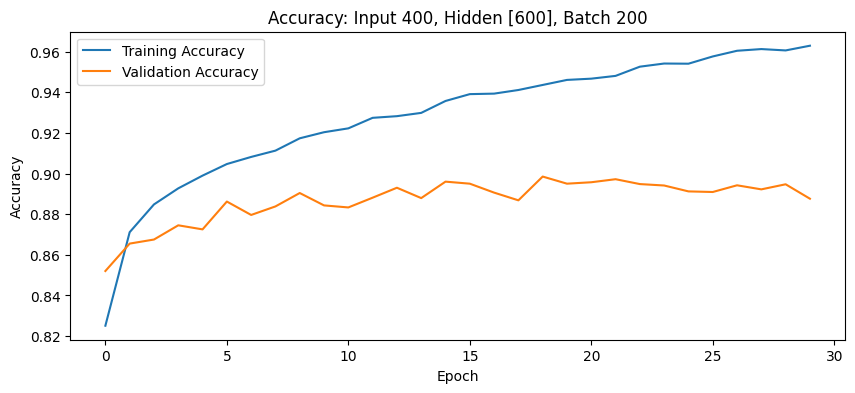


Training model with Input Neurons: 400, Hidden Layers: [600], Batch Size: 500
Epoch: 10, Training Accuracy: 0.9159166812896729, Test Accuracy: 0.8870000243186951
Epoch: 15, Training Accuracy: 0.9308500289916992, Test Accuracy: 0.8899999856948853
Epoch: 20, Training Accuracy: 0.9447833299636841, Test Accuracy: 0.8833000063896179
Epoch: 25, Training Accuracy: 0.9552000164985657, Test Accuracy: 0.8942000269889832
Epoch: 30, Training Accuracy: 0.9635666608810425, Test Accuracy: 0.8980000019073486


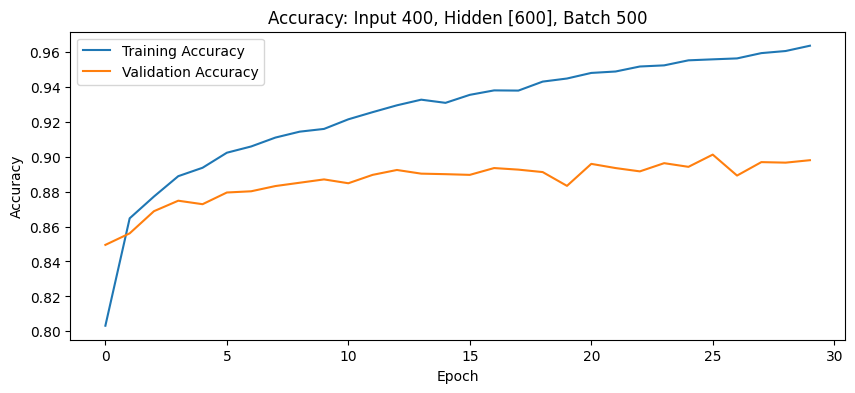


Training model with Input Neurons: 400, Hidden Layers: [800], Batch Size: 10
Epoch: 10, Training Accuracy: 0.9051666855812073, Test Accuracy: 0.8813999891281128
Epoch: 15, Training Accuracy: 0.9129999876022339, Test Accuracy: 0.8895000219345093
Epoch: 20, Training Accuracy: 0.9190166592597961, Test Accuracy: 0.8779000043869019
Epoch: 25, Training Accuracy: 0.9240000247955322, Test Accuracy: 0.8795999884605408
Epoch: 30, Training Accuracy: 0.9282833337783813, Test Accuracy: 0.8873000144958496


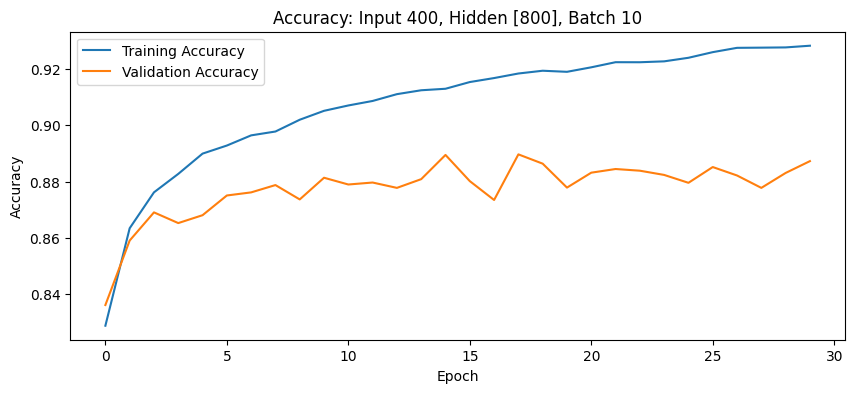


Training model with Input Neurons: 400, Hidden Layers: [800], Batch Size: 50
Epoch: 10, Training Accuracy: 0.918233335018158, Test Accuracy: 0.890999972820282
Epoch: 15, Training Accuracy: 0.9336333274841309, Test Accuracy: 0.8952000141143799
Epoch: 20, Training Accuracy: 0.9449499845504761, Test Accuracy: 0.8919000029563904
Epoch: 25, Training Accuracy: 0.953166663646698, Test Accuracy: 0.8930000066757202
Epoch: 30, Training Accuracy: 0.9598833322525024, Test Accuracy: 0.8950999975204468


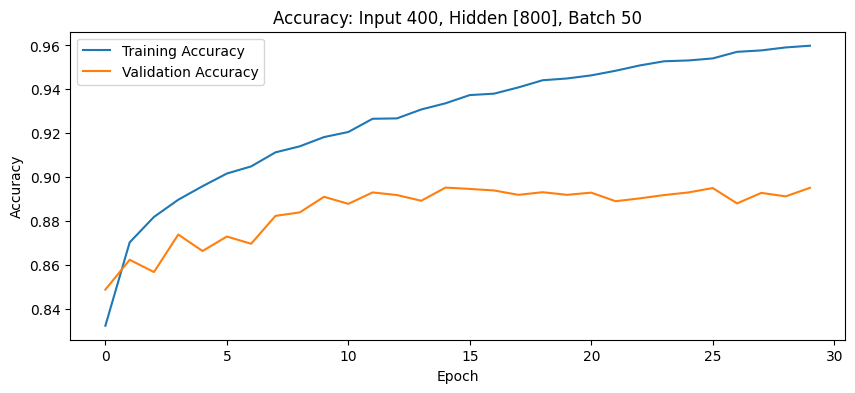


Training model with Input Neurons: 400, Hidden Layers: [800], Batch Size: 100
Epoch: 10, Training Accuracy: 0.9185166954994202, Test Accuracy: 0.881600022315979
Epoch: 15, Training Accuracy: 0.9336833357810974, Test Accuracy: 0.8931999802589417
Epoch: 20, Training Accuracy: 0.9458833336830139, Test Accuracy: 0.8938000202178955
Epoch: 25, Training Accuracy: 0.956083357334137, Test Accuracy: 0.8920999765396118
Epoch: 30, Training Accuracy: 0.9639833569526672, Test Accuracy: 0.8859000205993652


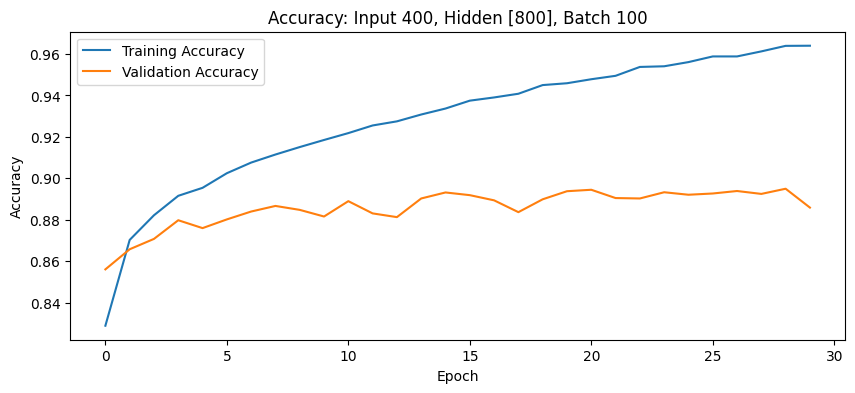


Training model with Input Neurons: 400, Hidden Layers: [800], Batch Size: 200
Epoch: 10, Training Accuracy: 0.9178500175476074, Test Accuracy: 0.8830999732017517
Epoch: 15, Training Accuracy: 0.9352666735649109, Test Accuracy: 0.8934999704360962
Epoch: 20, Training Accuracy: 0.9481833577156067, Test Accuracy: 0.892799973487854
Epoch: 25, Training Accuracy: 0.9585166573524475, Test Accuracy: 0.8920999765396118
Epoch: 30, Training Accuracy: 0.9664833545684814, Test Accuracy: 0.8973000049591064


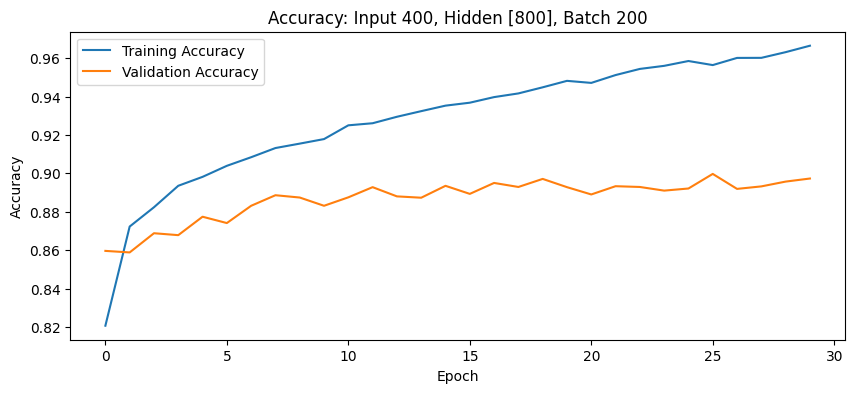


Training model with Input Neurons: 400, Hidden Layers: [800], Batch Size: 500
Epoch: 10, Training Accuracy: 0.9198333621025085, Test Accuracy: 0.8876000046730042
Epoch: 15, Training Accuracy: 0.9340166449546814, Test Accuracy: 0.8942000269889832
Epoch: 20, Training Accuracy: 0.9481833577156067, Test Accuracy: 0.8921999931335449
Epoch: 25, Training Accuracy: 0.956683337688446, Test Accuracy: 0.8910999894142151
Epoch: 30, Training Accuracy: 0.963616669178009, Test Accuracy: 0.8920000195503235


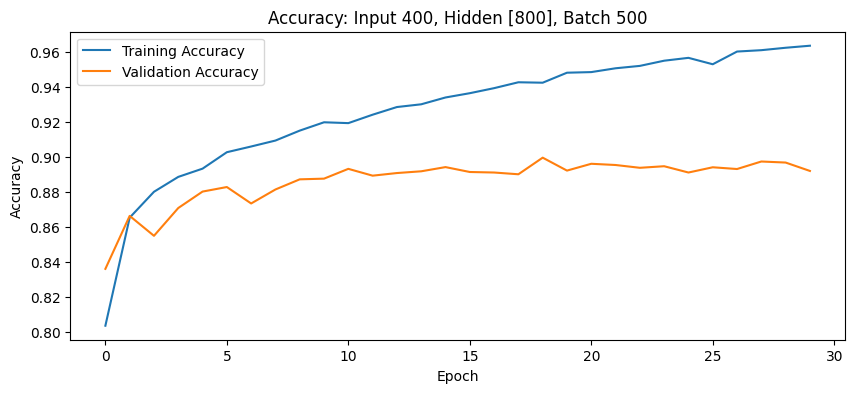


Training model with Input Neurons: 600, Hidden Layers: [200], Batch Size: 10
Epoch: 10, Training Accuracy: 0.9069666862487793, Test Accuracy: 0.880299985408783
Epoch: 15, Training Accuracy: 0.9174500107765198, Test Accuracy: 0.8876000046730042
Epoch: 20, Training Accuracy: 0.9249500036239624, Test Accuracy: 0.886900007724762
Epoch: 25, Training Accuracy: 0.9316333532333374, Test Accuracy: 0.8863999843597412
Epoch: 30, Training Accuracy: 0.9355999827384949, Test Accuracy: 0.8866000175476074


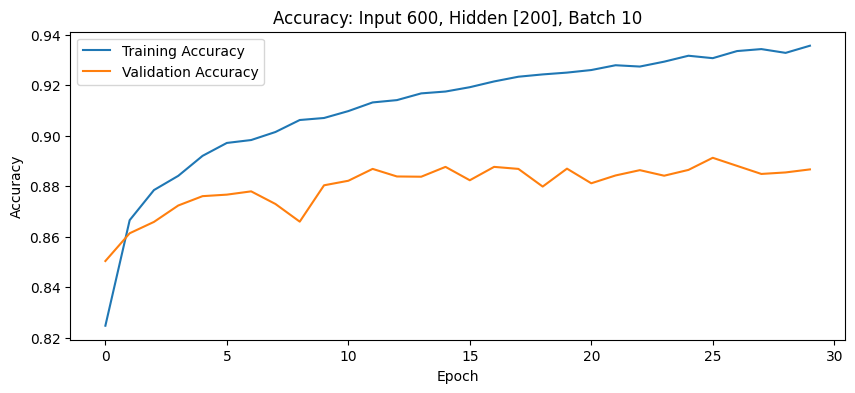


Training model with Input Neurons: 600, Hidden Layers: [200], Batch Size: 50
Epoch: 10, Training Accuracy: 0.917900025844574, Test Accuracy: 0.8838000297546387
Epoch: 15, Training Accuracy: 0.9319499731063843, Test Accuracy: 0.8906000256538391
Epoch: 20, Training Accuracy: 0.942550003528595, Test Accuracy: 0.8916000127792358
Epoch: 25, Training Accuracy: 0.9507166743278503, Test Accuracy: 0.8949000239372253
Epoch: 30, Training Accuracy: 0.956516683101654, Test Accuracy: 0.8944000005722046


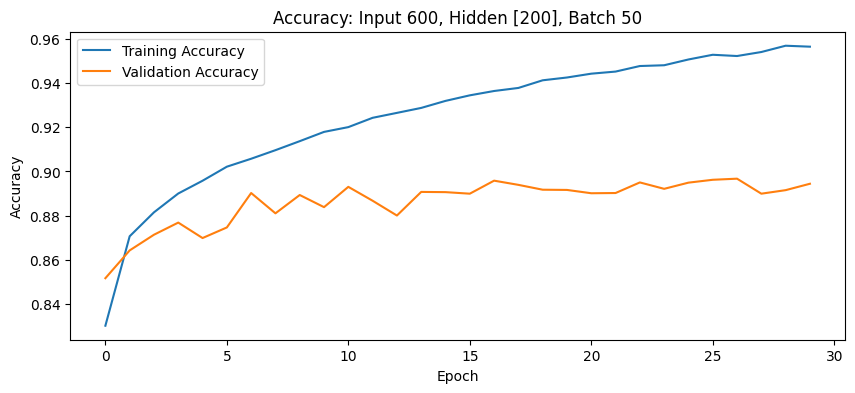


Training model with Input Neurons: 600, Hidden Layers: [200], Batch Size: 100
Epoch: 10, Training Accuracy: 0.91798335313797, Test Accuracy: 0.8834999799728394
Epoch: 15, Training Accuracy: 0.9323833584785461, Test Accuracy: 0.8939999938011169
Epoch: 20, Training Accuracy: 0.9438333511352539, Test Accuracy: 0.8924999833106995
Epoch: 25, Training Accuracy: 0.9526166915893555, Test Accuracy: 0.8999000191688538
Epoch: 30, Training Accuracy: 0.9610999822616577, Test Accuracy: 0.8950999975204468


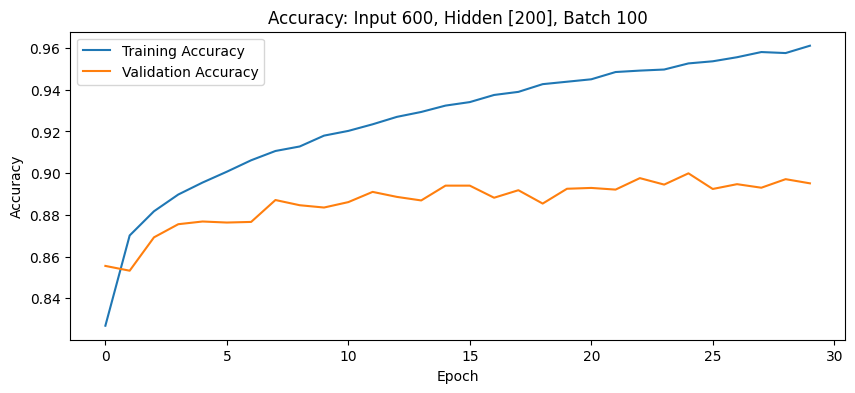


Training model with Input Neurons: 600, Hidden Layers: [200], Batch Size: 200
Epoch: 10, Training Accuracy: 0.916100025177002, Test Accuracy: 0.8828999996185303
Epoch: 15, Training Accuracy: 0.9309499859809875, Test Accuracy: 0.8968999981880188
Epoch: 20, Training Accuracy: 0.943149983882904, Test Accuracy: 0.8952000141143799
Epoch: 25, Training Accuracy: 0.9518333077430725, Test Accuracy: 0.8944000005722046
Epoch: 30, Training Accuracy: 0.9595333337783813, Test Accuracy: 0.8949000239372253


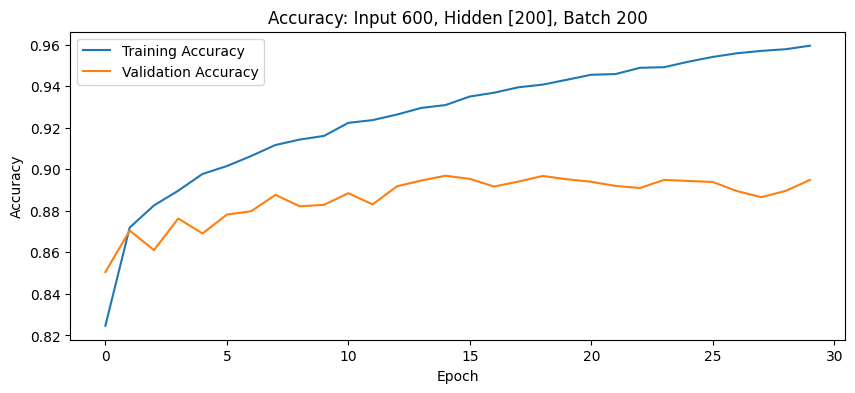


Training model with Input Neurons: 600, Hidden Layers: [200], Batch Size: 500
Epoch: 10, Training Accuracy: 0.9167500138282776, Test Accuracy: 0.8906000256538391
Epoch: 15, Training Accuracy: 0.9308666586875916, Test Accuracy: 0.88919997215271
Epoch: 20, Training Accuracy: 0.9413999915122986, Test Accuracy: 0.8932999968528748
Epoch: 25, Training Accuracy: 0.949916660785675, Test Accuracy: 0.8928999900817871
Epoch: 30, Training Accuracy: 0.9613166451454163, Test Accuracy: 0.8989999890327454


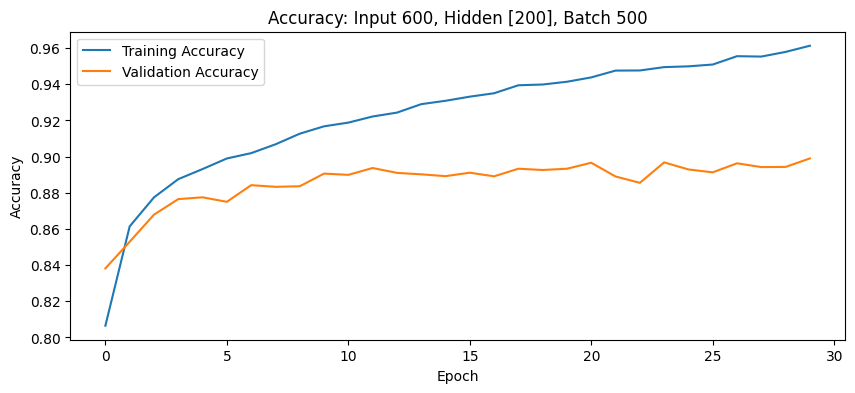


Training model with Input Neurons: 600, Hidden Layers: [300], Batch Size: 10
Epoch: 10, Training Accuracy: 0.9069499969482422, Test Accuracy: 0.8744000196456909
Epoch: 15, Training Accuracy: 0.9156333208084106, Test Accuracy: 0.8752999901771545
Epoch: 20, Training Accuracy: 0.9224666953086853, Test Accuracy: 0.8770999908447266
Epoch: 25, Training Accuracy: 0.927649974822998, Test Accuracy: 0.8849999904632568
Epoch: 30, Training Accuracy: 0.9313833117485046, Test Accuracy: 0.8823000192642212


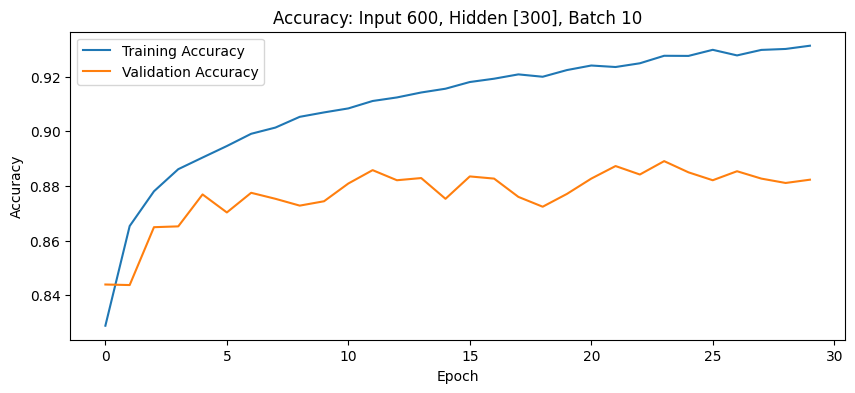


Training model with Input Neurons: 600, Hidden Layers: [300], Batch Size: 50
Epoch: 10, Training Accuracy: 0.9175333380699158, Test Accuracy: 0.8907999992370605
Epoch: 15, Training Accuracy: 0.9311500191688538, Test Accuracy: 0.885200023651123
Epoch: 20, Training Accuracy: 0.942716658115387, Test Accuracy: 0.8937000036239624
Epoch: 25, Training Accuracy: 0.9520999789237976, Test Accuracy: 0.8925999999046326
Epoch: 30, Training Accuracy: 0.9567999839782715, Test Accuracy: 0.8948000073432922


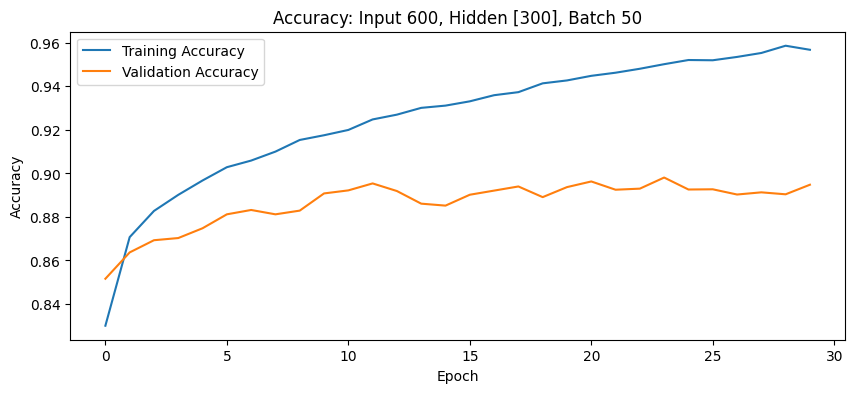


Training model with Input Neurons: 600, Hidden Layers: [300], Batch Size: 100
Epoch: 10, Training Accuracy: 0.9197166562080383, Test Accuracy: 0.890500009059906
Epoch: 15, Training Accuracy: 0.9331833124160767, Test Accuracy: 0.8903999924659729
Epoch: 20, Training Accuracy: 0.9451333284378052, Test Accuracy: 0.8925999999046326
Epoch: 25, Training Accuracy: 0.9533833265304565, Test Accuracy: 0.8967000246047974
Epoch: 30, Training Accuracy: 0.9627500176429749, Test Accuracy: 0.8934000134468079


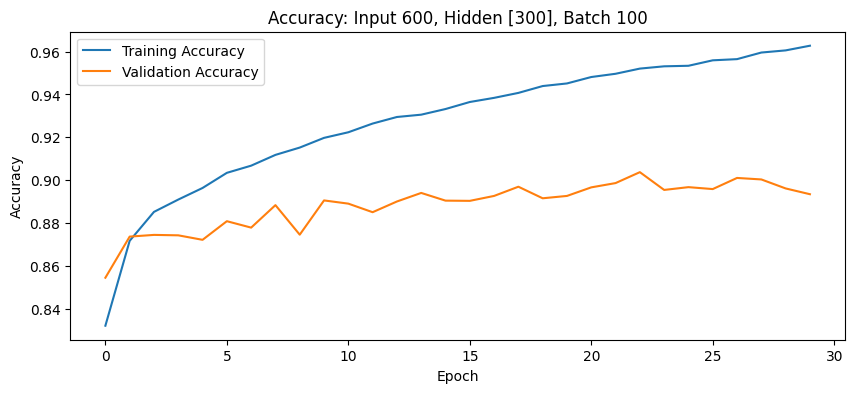


Training model with Input Neurons: 600, Hidden Layers: [300], Batch Size: 200
Epoch: 10, Training Accuracy: 0.9174166917800903, Test Accuracy: 0.8878999948501587
Epoch: 15, Training Accuracy: 0.9332333207130432, Test Accuracy: 0.891700029373169
Epoch: 20, Training Accuracy: 0.944516658782959, Test Accuracy: 0.8946999907493591
Epoch: 25, Training Accuracy: 0.9545000195503235, Test Accuracy: 0.897599995136261
Epoch: 30, Training Accuracy: 0.9628166556358337, Test Accuracy: 0.8996000289916992


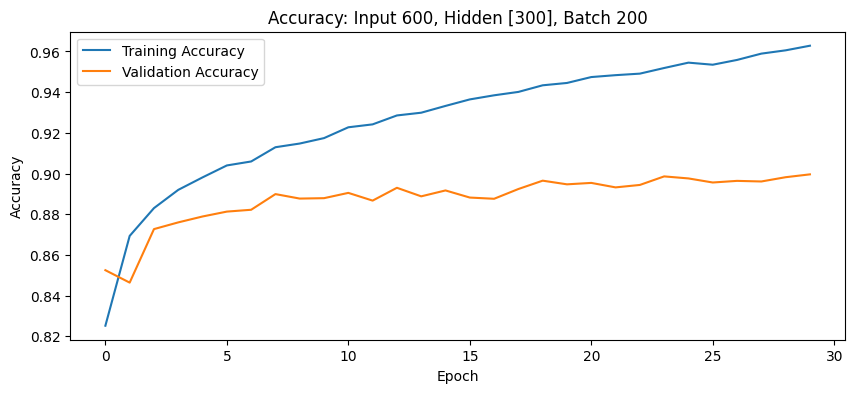


Training model with Input Neurons: 600, Hidden Layers: [300], Batch Size: 500
Epoch: 10, Training Accuracy: 0.9158333539962769, Test Accuracy: 0.8876000046730042
Epoch: 15, Training Accuracy: 0.93381667137146, Test Accuracy: 0.8891000151634216
Epoch: 20, Training Accuracy: 0.9436333179473877, Test Accuracy: 0.8960000276565552
Epoch: 25, Training Accuracy: 0.9506999850273132, Test Accuracy: 0.8920000195503235
Epoch: 30, Training Accuracy: 0.9609666466712952, Test Accuracy: 0.8902999758720398


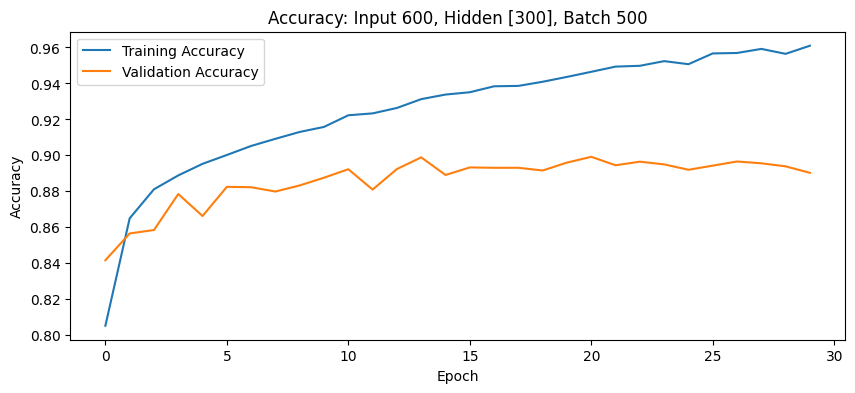


Training model with Input Neurons: 600, Hidden Layers: [400], Batch Size: 10
Epoch: 10, Training Accuracy: 0.9047499895095825, Test Accuracy: 0.8820000290870667
Epoch: 15, Training Accuracy: 0.9143333435058594, Test Accuracy: 0.8894000053405762
Epoch: 20, Training Accuracy: 0.9212999939918518, Test Accuracy: 0.8901000022888184
Epoch: 25, Training Accuracy: 0.9261000156402588, Test Accuracy: 0.8899999856948853
Epoch: 30, Training Accuracy: 0.9297500252723694, Test Accuracy: 0.8845999836921692


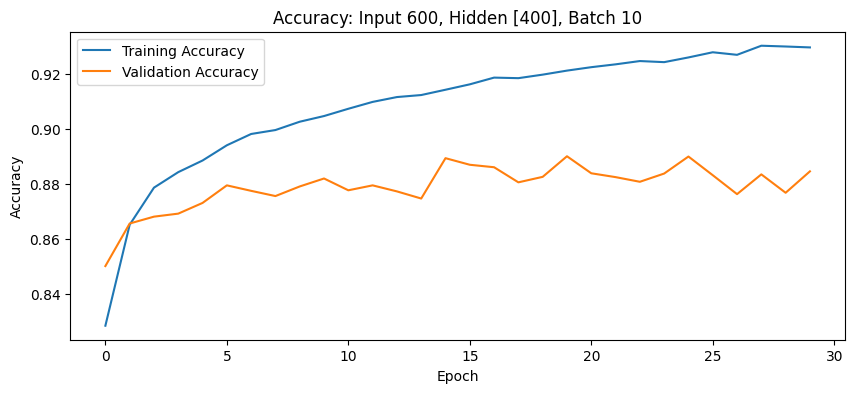


Training model with Input Neurons: 600, Hidden Layers: [400], Batch Size: 50
Epoch: 10, Training Accuracy: 0.9183333516120911, Test Accuracy: 0.8840000033378601
Epoch: 15, Training Accuracy: 0.9322333335876465, Test Accuracy: 0.8916000127792358
Epoch: 20, Training Accuracy: 0.9441333413124084, Test Accuracy: 0.8925999999046326
Epoch: 25, Training Accuracy: 0.9521666765213013, Test Accuracy: 0.8919000029563904
Epoch: 30, Training Accuracy: 0.9594833254814148, Test Accuracy: 0.895799994468689


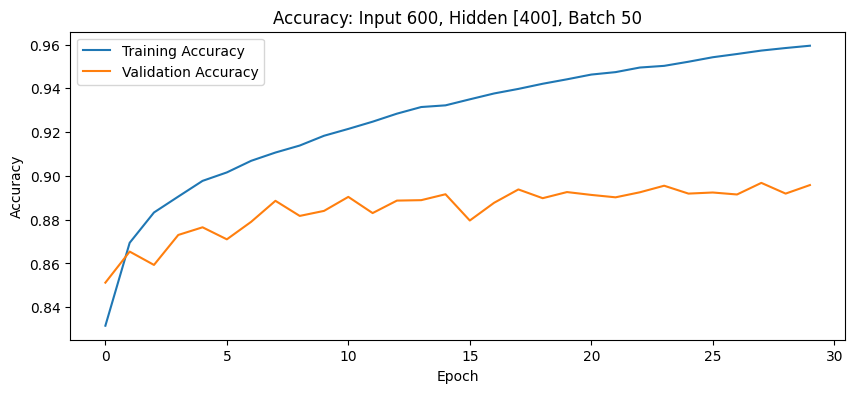


Training model with Input Neurons: 600, Hidden Layers: [400], Batch Size: 100
Epoch: 10, Training Accuracy: 0.9190333485603333, Test Accuracy: 0.8920000195503235
Epoch: 15, Training Accuracy: 0.9334499835968018, Test Accuracy: 0.8939999938011169
Epoch: 20, Training Accuracy: 0.9456333518028259, Test Accuracy: 0.8930000066757202
Epoch: 25, Training Accuracy: 0.9549333453178406, Test Accuracy: 0.8924999833106995
Epoch: 30, Training Accuracy: 0.963616669178009, Test Accuracy: 0.8942999839782715


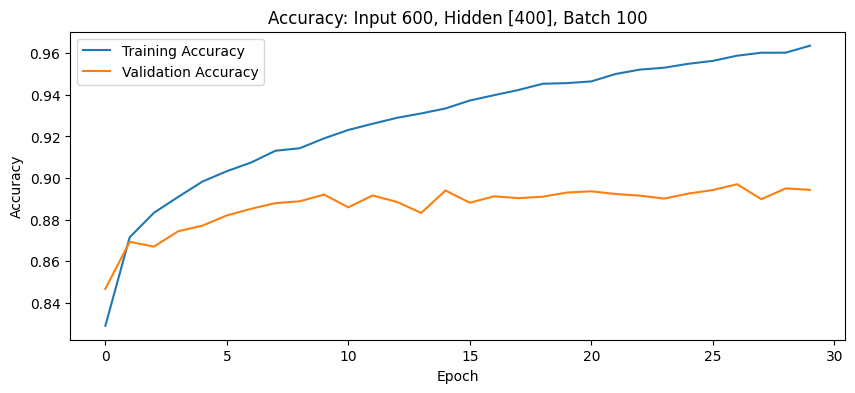


Training model with Input Neurons: 600, Hidden Layers: [400], Batch Size: 200
Epoch: 10, Training Accuracy: 0.9203166961669922, Test Accuracy: 0.8895000219345093
Epoch: 15, Training Accuracy: 0.9350833296775818, Test Accuracy: 0.8939999938011169
Epoch: 20, Training Accuracy: 0.9468166828155518, Test Accuracy: 0.8859999775886536
Epoch: 25, Training Accuracy: 0.9558500051498413, Test Accuracy: 0.8952999711036682
Epoch: 30, Training Accuracy: 0.9633499979972839, Test Accuracy: 0.8946999907493591


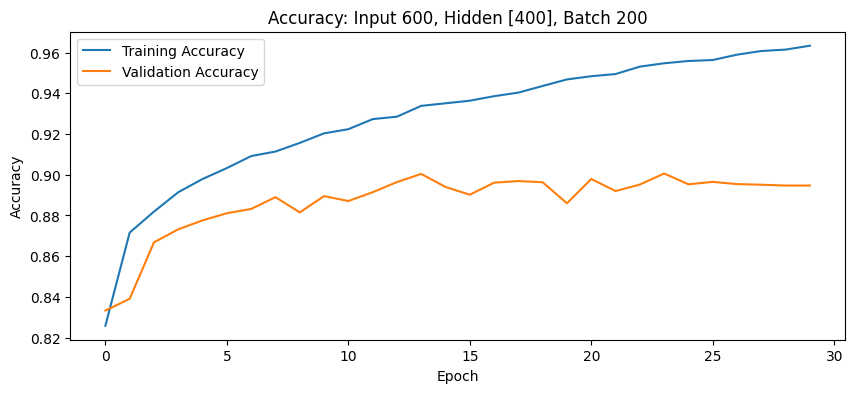


Training model with Input Neurons: 600, Hidden Layers: [400], Batch Size: 500
Epoch: 10, Training Accuracy: 0.9182500243186951, Test Accuracy: 0.892300009727478
Epoch: 15, Training Accuracy: 0.9334666728973389, Test Accuracy: 0.8949999809265137
Epoch: 20, Training Accuracy: 0.9449666738510132, Test Accuracy: 0.8942999839782715
Epoch: 25, Training Accuracy: 0.9550833106040955, Test Accuracy: 0.8816999793052673
Epoch: 30, Training Accuracy: 0.9623166918754578, Test Accuracy: 0.9000999927520752


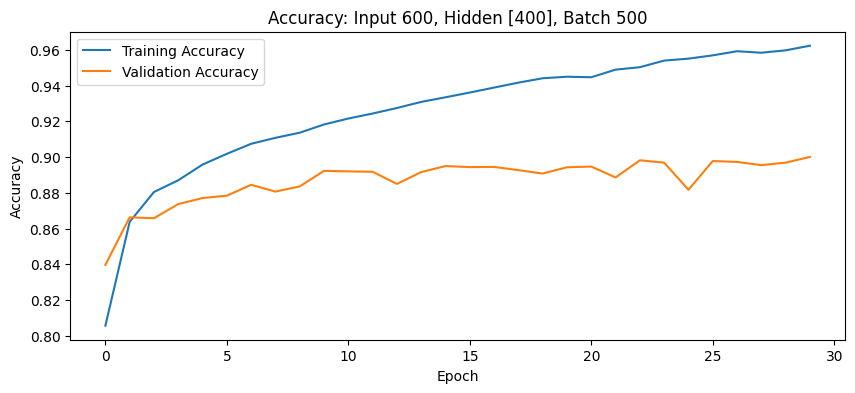


Training model with Input Neurons: 600, Hidden Layers: [600], Batch Size: 10
Epoch: 10, Training Accuracy: 0.9059666395187378, Test Accuracy: 0.883400022983551
Epoch: 15, Training Accuracy: 0.9152666926383972, Test Accuracy: 0.8873000144958496
Epoch: 20, Training Accuracy: 0.9223499894142151, Test Accuracy: 0.8903999924659729
Epoch: 25, Training Accuracy: 0.9254500269889832, Test Accuracy: 0.88919997215271
Epoch: 30, Training Accuracy: 0.9289166927337646, Test Accuracy: 0.8906000256538391


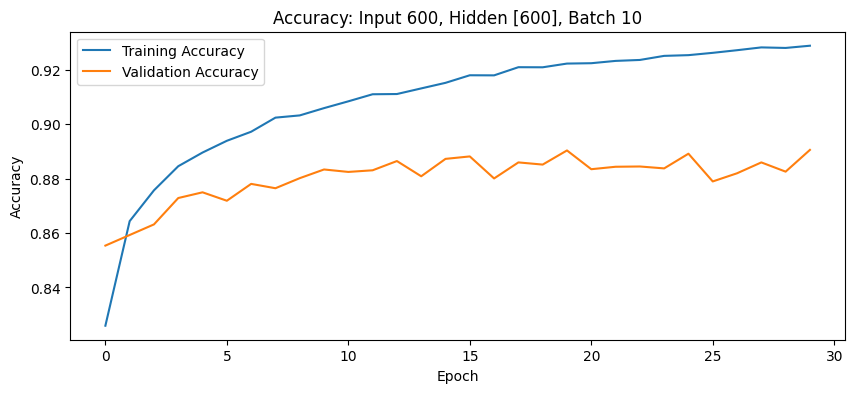


Training model with Input Neurons: 600, Hidden Layers: [600], Batch Size: 50
Epoch: 10, Training Accuracy: 0.9175999760627747, Test Accuracy: 0.8855000138282776
Epoch: 15, Training Accuracy: 0.9317166805267334, Test Accuracy: 0.8916000127792358
Epoch: 20, Training Accuracy: 0.9434666633605957, Test Accuracy: 0.8830000162124634
Epoch: 25, Training Accuracy: 0.9524833559989929, Test Accuracy: 0.8917999863624573
Epoch: 30, Training Accuracy: 0.9617166519165039, Test Accuracy: 0.891700029373169


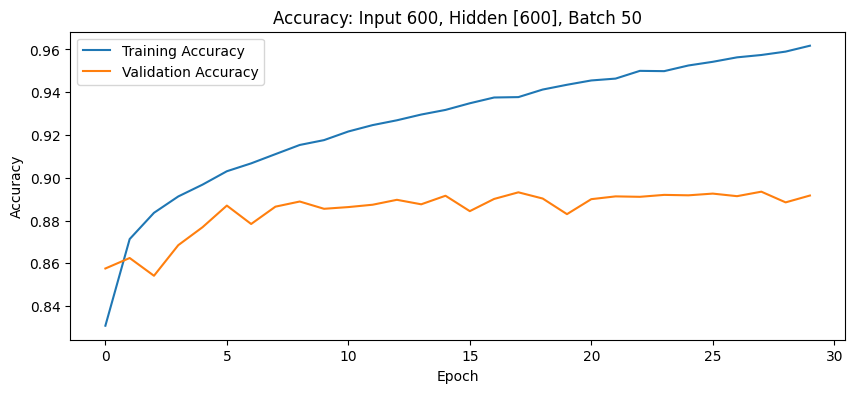


Training model with Input Neurons: 600, Hidden Layers: [600], Batch Size: 100
Epoch: 10, Training Accuracy: 0.9190999865531921, Test Accuracy: 0.8840000033378601
Epoch: 15, Training Accuracy: 0.9356333613395691, Test Accuracy: 0.8848000168800354
Epoch: 20, Training Accuracy: 0.946316659450531, Test Accuracy: 0.8876000046730042
Epoch: 25, Training Accuracy: 0.9549499750137329, Test Accuracy: 0.8920000195503235
Epoch: 30, Training Accuracy: 0.9640166759490967, Test Accuracy: 0.89410001039505


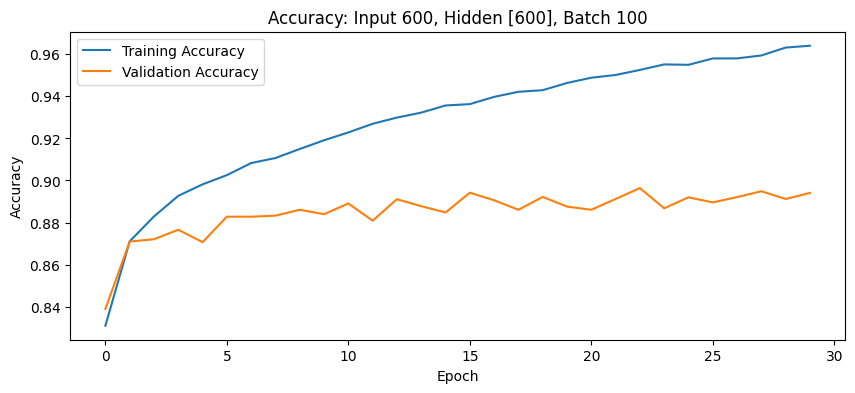


Training model with Input Neurons: 600, Hidden Layers: [600], Batch Size: 200
Epoch: 10, Training Accuracy: 0.9189333319664001, Test Accuracy: 0.8878999948501587
Epoch: 15, Training Accuracy: 0.935783326625824, Test Accuracy: 0.8963000178337097
Epoch: 20, Training Accuracy: 0.9467999935150146, Test Accuracy: 0.8935999870300293
Epoch: 25, Training Accuracy: 0.9562000036239624, Test Accuracy: 0.8968999981880188
Epoch: 30, Training Accuracy: 0.9676833152770996, Test Accuracy: 0.899399995803833


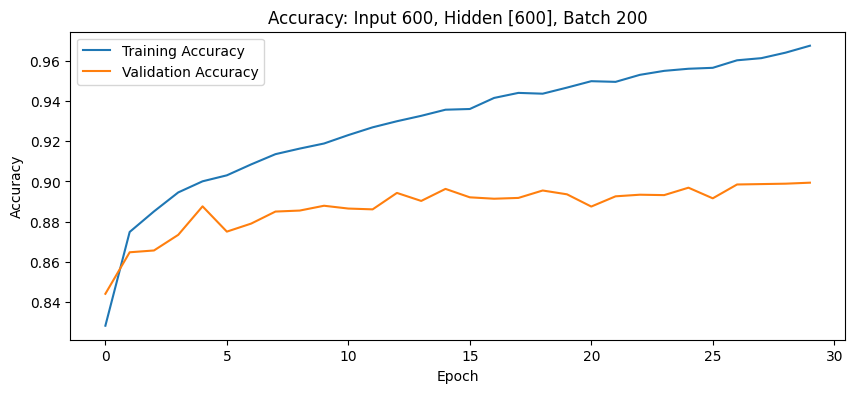


Training model with Input Neurons: 600, Hidden Layers: [600], Batch Size: 500
Epoch: 10, Training Accuracy: 0.9193166494369507, Test Accuracy: 0.885200023651123
Epoch: 15, Training Accuracy: 0.9348333477973938, Test Accuracy: 0.8953999876976013
Epoch: 20, Training Accuracy: 0.9470833539962769, Test Accuracy: 0.8938999772071838
Epoch: 25, Training Accuracy: 0.9554666876792908, Test Accuracy: 0.8981000185012817
Epoch: 30, Training Accuracy: 0.9631666541099548, Test Accuracy: 0.8960999846458435


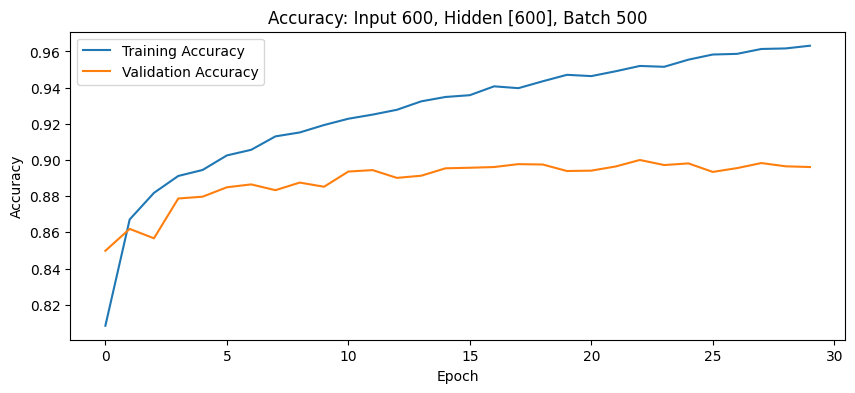


Training model with Input Neurons: 600, Hidden Layers: [800], Batch Size: 10
Epoch: 10, Training Accuracy: 0.9053000211715698, Test Accuracy: 0.8813999891281128
Epoch: 15, Training Accuracy: 0.9134166836738586, Test Accuracy: 0.8709999918937683
Epoch: 20, Training Accuracy: 0.9188166856765747, Test Accuracy: 0.8718000054359436
Epoch: 25, Training Accuracy: 0.92535001039505, Test Accuracy: 0.8848000168800354
Epoch: 30, Training Accuracy: 0.9287166595458984, Test Accuracy: 0.881600022315979


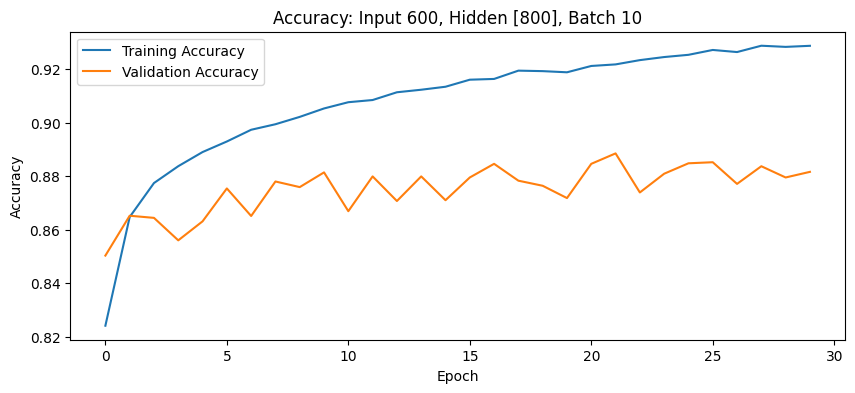


Training model with Input Neurons: 600, Hidden Layers: [800], Batch Size: 50
Epoch: 10, Training Accuracy: 0.9180499911308289, Test Accuracy: 0.8848000168800354
Epoch: 15, Training Accuracy: 0.933566689491272, Test Accuracy: 0.8827999830245972
Epoch: 20, Training Accuracy: 0.944599986076355, Test Accuracy: 0.8909000158309937
Epoch: 25, Training Accuracy: 0.9523833394050598, Test Accuracy: 0.8924999833106995
Epoch: 30, Training Accuracy: 0.9610499739646912, Test Accuracy: 0.8934999704360962


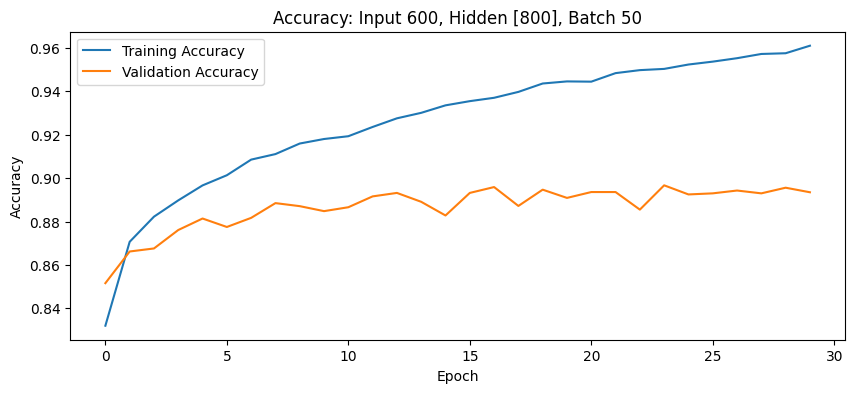


Training model with Input Neurons: 600, Hidden Layers: [800], Batch Size: 100
Epoch: 10, Training Accuracy: 0.9207000136375427, Test Accuracy: 0.8925999999046326
Epoch: 15, Training Accuracy: 0.9357500076293945, Test Accuracy: 0.8899999856948853
Epoch: 20, Training Accuracy: 0.9465500116348267, Test Accuracy: 0.8944000005722046
Epoch: 25, Training Accuracy: 0.9574833512306213, Test Accuracy: 0.8960000276565552
Epoch: 30, Training Accuracy: 0.964033305644989, Test Accuracy: 0.8953999876976013


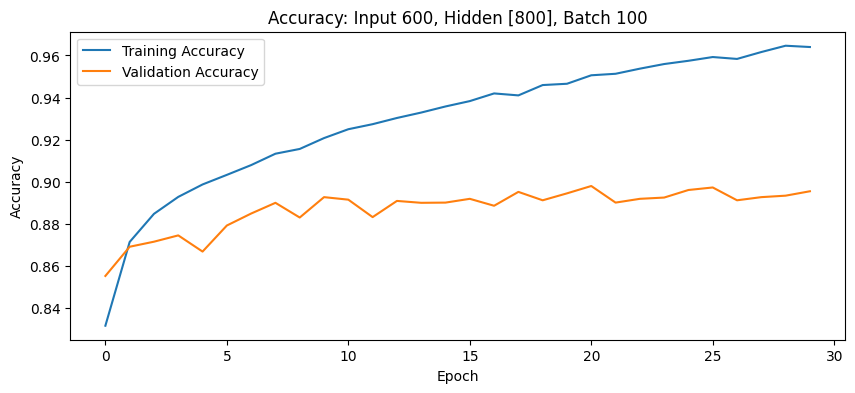


Training model with Input Neurons: 600, Hidden Layers: [800], Batch Size: 200
Epoch: 10, Training Accuracy: 0.9194833040237427, Test Accuracy: 0.8824999928474426
Epoch: 15, Training Accuracy: 0.9360666871070862, Test Accuracy: 0.8895000219345093
Epoch: 20, Training Accuracy: 0.9487000107765198, Test Accuracy: 0.8953999876976013
Epoch: 25, Training Accuracy: 0.9579333066940308, Test Accuracy: 0.8902000188827515
Epoch: 30, Training Accuracy: 0.9656999707221985, Test Accuracy: 0.8982999920845032


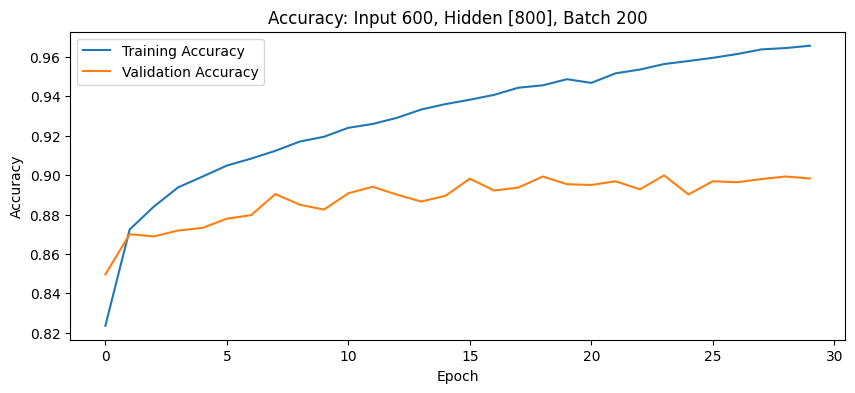


Training model with Input Neurons: 600, Hidden Layers: [800], Batch Size: 500
Epoch: 10, Training Accuracy: 0.9213666915893555, Test Accuracy: 0.8693000078201294
Epoch: 15, Training Accuracy: 0.9351500272750854, Test Accuracy: 0.8952999711036682
Epoch: 20, Training Accuracy: 0.9488666653633118, Test Accuracy: 0.890999972820282
Epoch: 25, Training Accuracy: 0.9561333060264587, Test Accuracy: 0.8977000117301941
Epoch: 30, Training Accuracy: 0.9647499918937683, Test Accuracy: 0.8984000086784363


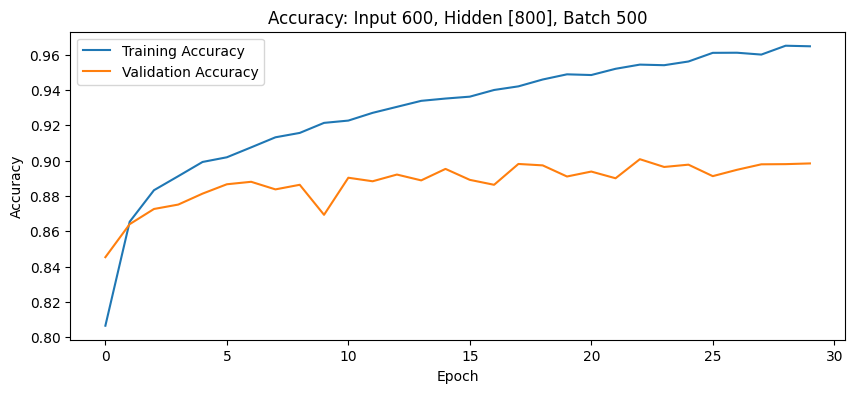


Training model with Input Neurons: 800, Hidden Layers: [200], Batch Size: 10
Epoch: 10, Training Accuracy: 0.9080333113670349, Test Accuracy: 0.8744000196456909
Epoch: 15, Training Accuracy: 0.918066680431366, Test Accuracy: 0.8851000070571899
Epoch: 20, Training Accuracy: 0.9259999990463257, Test Accuracy: 0.8896999955177307
Epoch: 25, Training Accuracy: 0.9318000078201294, Test Accuracy: 0.8859999775886536
Epoch: 30, Training Accuracy: 0.93586665391922, Test Accuracy: 0.8902000188827515


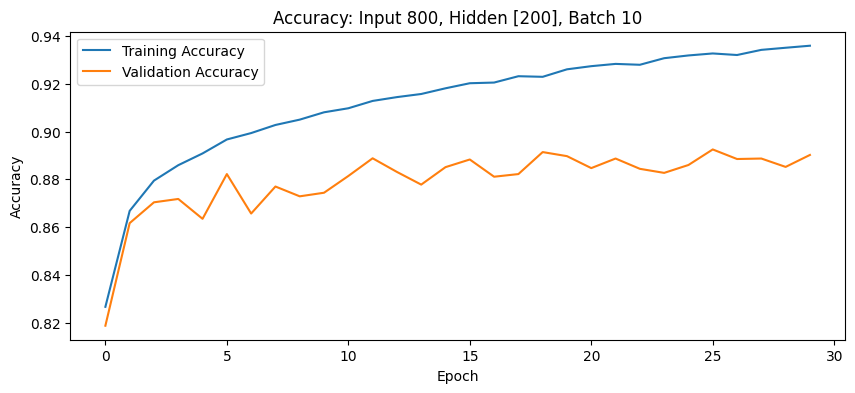


Training model with Input Neurons: 800, Hidden Layers: [200], Batch Size: 50
Epoch: 10, Training Accuracy: 0.916949987411499, Test Accuracy: 0.891700029373169
Epoch: 15, Training Accuracy: 0.9322333335876465, Test Accuracy: 0.8885999917984009
Epoch: 20, Training Accuracy: 0.9429500102996826, Test Accuracy: 0.8934999704360962
Epoch: 25, Training Accuracy: 0.9517166614532471, Test Accuracy: 0.8913999795913696
Epoch: 30, Training Accuracy: 0.9572666883468628, Test Accuracy: 0.892300009727478


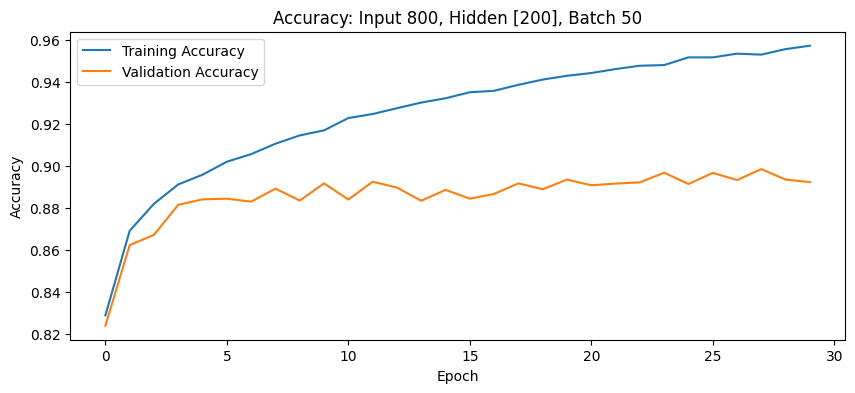


Training model with Input Neurons: 800, Hidden Layers: [200], Batch Size: 100
Epoch: 10, Training Accuracy: 0.9169166684150696, Test Accuracy: 0.8848999738693237
Epoch: 15, Training Accuracy: 0.9330999851226807, Test Accuracy: 0.8899999856948853
Epoch: 20, Training Accuracy: 0.9424999952316284, Test Accuracy: 0.8999000191688538
Epoch: 25, Training Accuracy: 0.9531000256538391, Test Accuracy: 0.8966000080108643
Epoch: 30, Training Accuracy: 0.9601166844367981, Test Accuracy: 0.8917999863624573


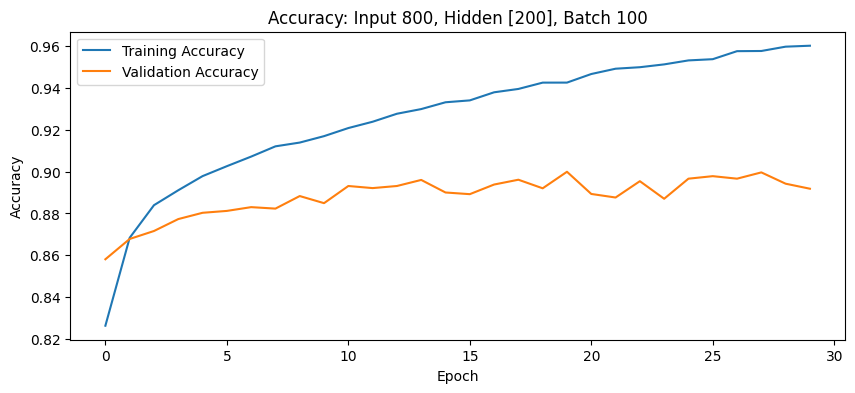


Training model with Input Neurons: 800, Hidden Layers: [200], Batch Size: 200
Epoch: 10, Training Accuracy: 0.9182000160217285, Test Accuracy: 0.8862000107765198
Epoch: 15, Training Accuracy: 0.9320833086967468, Test Accuracy: 0.8942999839782715
Epoch: 20, Training Accuracy: 0.9448833465576172, Test Accuracy: 0.8962000012397766
Epoch: 25, Training Accuracy: 0.9542666673660278, Test Accuracy: 0.896399974822998
Epoch: 30, Training Accuracy: 0.9590333104133606, Test Accuracy: 0.8934000134468079


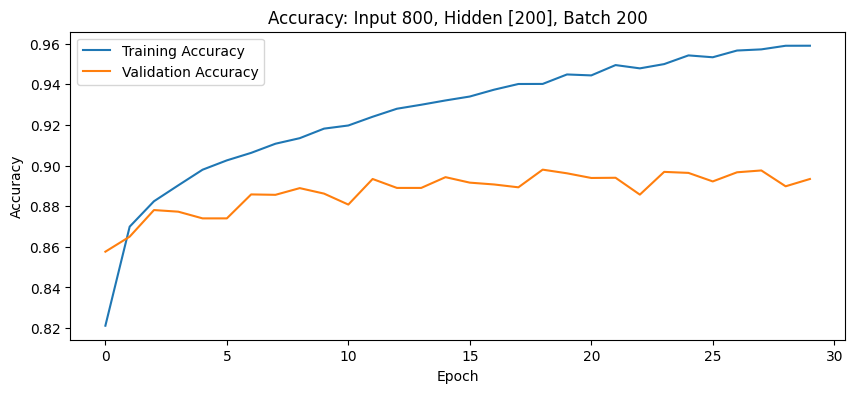


Training model with Input Neurons: 800, Hidden Layers: [200], Batch Size: 500
Epoch: 10, Training Accuracy: 0.9165499806404114, Test Accuracy: 0.8863999843597412
Epoch: 15, Training Accuracy: 0.9320666790008545, Test Accuracy: 0.886900007724762
Epoch: 20, Training Accuracy: 0.9425333142280579, Test Accuracy: 0.8909000158309937
Epoch: 25, Training Accuracy: 0.9519500136375427, Test Accuracy: 0.8978999853134155
Epoch: 30, Training Accuracy: 0.9586666822433472, Test Accuracy: 0.8931000232696533


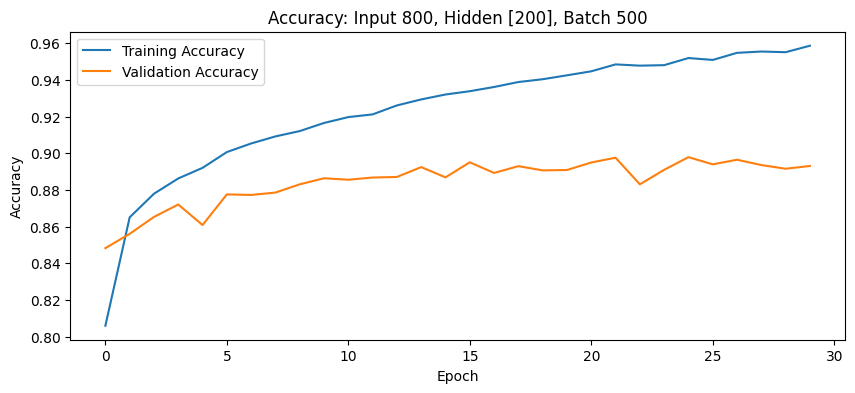


Training model with Input Neurons: 800, Hidden Layers: [300], Batch Size: 10


KeyboardInterrupt: 

In [27]:
results = []


def create_model(input_neurons, hidden_neurons):
    model = Sequential()
    model.add(Dense(input_neurons, activation='relu', input_shape=(784,)))
    for neurons in hidden_neurons:
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

def train_model(model, input_neurons, hidden_neurons, batch_size, epochs=30):
    accuracies = {}
    history_acc = []
    history_val_acc = []

    def save_accuracy(epoch, logs):
        history_acc.append(logs['accuracy'])
        history_val_acc.append(logs['val_accuracy'])
        if epoch + 1 in [10, 15, 20, 25, 30]:
            print(f"Epoch: {epoch + 1}, Training Accuracy: {logs['accuracy']}, Test Accuracy: {logs['val_accuracy']}")
            accuracies[epoch + 1] = [round(logs['accuracy'], 5), round(logs['val_accuracy'], 5)]
            results.append([input_neurons, str(hidden_neurons), epoch + 1, batch_size, logs['accuracy'], logs['val_accuracy']])

    print_accuracy = LambdaCallback(on_epoch_end=save_accuracy)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, verbose=0, callbacks=[print_accuracy])

    plt.figure(figsize=(10, 4))
    plt.plot(history_acc, label='Training Accuracy')
    plt.plot(history_val_acc, label='Validation Accuracy')
    plt.title(f"Accuracy: Input {input_neurons}, Hidden {hidden_neurons}, Batch {batch_size}")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

input_neurons_options = [400, 600, 800, 1200]
hidden_neurons_options = [[200], [300], [400], [600], [800]]
batch_size_options = [10, 50, 100, 200, 500]

for input_neurons in input_neurons_options:
    for hidden_neurons in hidden_neurons_options:
        for batch_size in batch_size_options:
            print(f"\nTraining model with Input Neurons: {input_neurons}, Hidden Layers: {hidden_neurons}, Batch Size: {batch_size}")
            model = create_model(input_neurons, hidden_neurons)
            train_model(model, input_neurons, hidden_neurons, batch_size)

Пришлось прервать цикл проверки всех нейронных сетей, т.к. было близко к ограничению на гпу колаба
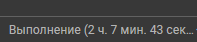

Преобразуем все данные в эксель файл

In [28]:
import pandas as pd
df = pd.DataFrame(results, columns=['Количество нейронов на входном слое', 'Количество нейронов на скрытом слое', 'Эпоха', 'Размер мини-выборки', 'Accuracy train', 'Accuracy test'])
df.to_excel('results.xlsx', index=False)